In [1]:
filename = "s_unit_attack_output_2025-04-18_11.02.32.csv"

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colormaps
import csv
from collections import defaultdict

In [3]:
def load_csv(filename):
    grouped_data = defaultdict(lambda: {
        "n": None,
        "k": None,
        "start_index": None,
        "end_index": None,
        "runs": []
    })

    with open(filename, 'r', newline='') as csvfile:
        reader = csv.DictReader(csvfile)
        for row in reader:
            # Parse base parameters
            n = int(row["n"])
            k = float(row["k"])
            start_index = int(row["start_index"])
            end_index = int(row["end_index"])
            
            key = (n, k, start_index, end_index)

            grouped_data[key]["n"] = n
            grouped_data[key]["k"] = k
            grouped_data[key]["start_index"] = start_index
            grouped_data[key]["end_index"] = end_index

            # Clean and convert values
            try:
                run = {
                    "i": int(row["iteration"]),
                    "iterations": int(row["num_inner_iteration"]),
                    "alpha_in": str(row["alpha_in"]),
                    "alpha_in_norm": float(row["alpha_in_norm"]),
                    "alpha_out": str(row["alpha_out"]),
                    "alpha_out_norm": float(row["alpha_out_norm"]),
                    "alpha_in_norm": float(row["alpha_in_norm"]),
                    "time": float(row["time"]),
                }
            except Exception as e:
                print(f"Error parsing row: {row}\n{e}")
                continue

            grouped_data[key]["runs"].append(run)

    return list(grouped_data.values())


In [4]:
data = load_csv(filename)

print(f"{len(data)} blocks loaded from {filename}")

869 blocks loaded from s_unit_attack_output_2025-04-18_11.02.32.csv


In [5]:
nmin = min([d["n"] for d in data])
nmax = max([d["n"] for d in data])

In [6]:

def plot(key, key_title, colormap = "inferno", ignore_ks=[]):
    num_plots = nmax - nmin + 1
    cols = min(3, num_plots)
    rows = (num_plots + cols - 1) // cols

    plt.figure(figsize=(7 * cols, 7 * rows))
    # plt.suptitle(f'{key_title} vs Start Index')

    for n in range(nmin, nmax + 1):
        plt.subplot(rows, cols, n - nmin + 1)
        
        filtered = [block for block in data if block["n"] == n]
        mapped_values_mean = {}
        mapped_iterations_stderr = {}

        for block in filtered:
            k = block["k"]
            if k in ignore_ks: continue
            start_index = block["start_index"] 

            if k not in mapped_values_mean:
                mapped_values_mean[k] = {}
                mapped_iterations_stderr[k] = {}

            if len(block["runs"]) == 0:
                continue

            values = [run[key] for run in block["runs"]]
            avg_iterations = sum(values) / len(values)
            stderr = np.std(values) / np.sqrt(len(values))

            mapped_values_mean[k][start_index] = avg_iterations
            mapped_iterations_stderr[k][start_index] = stderr

        for i, (k, m) in enumerate(mapped_values_mean.items(), 1):
            x = list(m.keys())
            y = list(m.values())
            yerr = [mapped_iterations_stderr[k][val] for val in x]
            
            c = colormaps[colormap](i / len(mapped_values_mean))

            plt.plot(x, y, 'o-', color=c, label=f'{k}')
            plt.fill_between(x, np.array(y) - np.array(yerr), np.array(y) + np.array(yerr), alpha=0.2, color=c)
            plt.xlabel('Start Index')
            plt.ylabel(f'Avg {key_title}')
            plt.title(f'n={n}')
            plt.grid(True)
            plt.legend(loc='lower right', fontsize='small', title="k values", title_fontsize='medium')

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

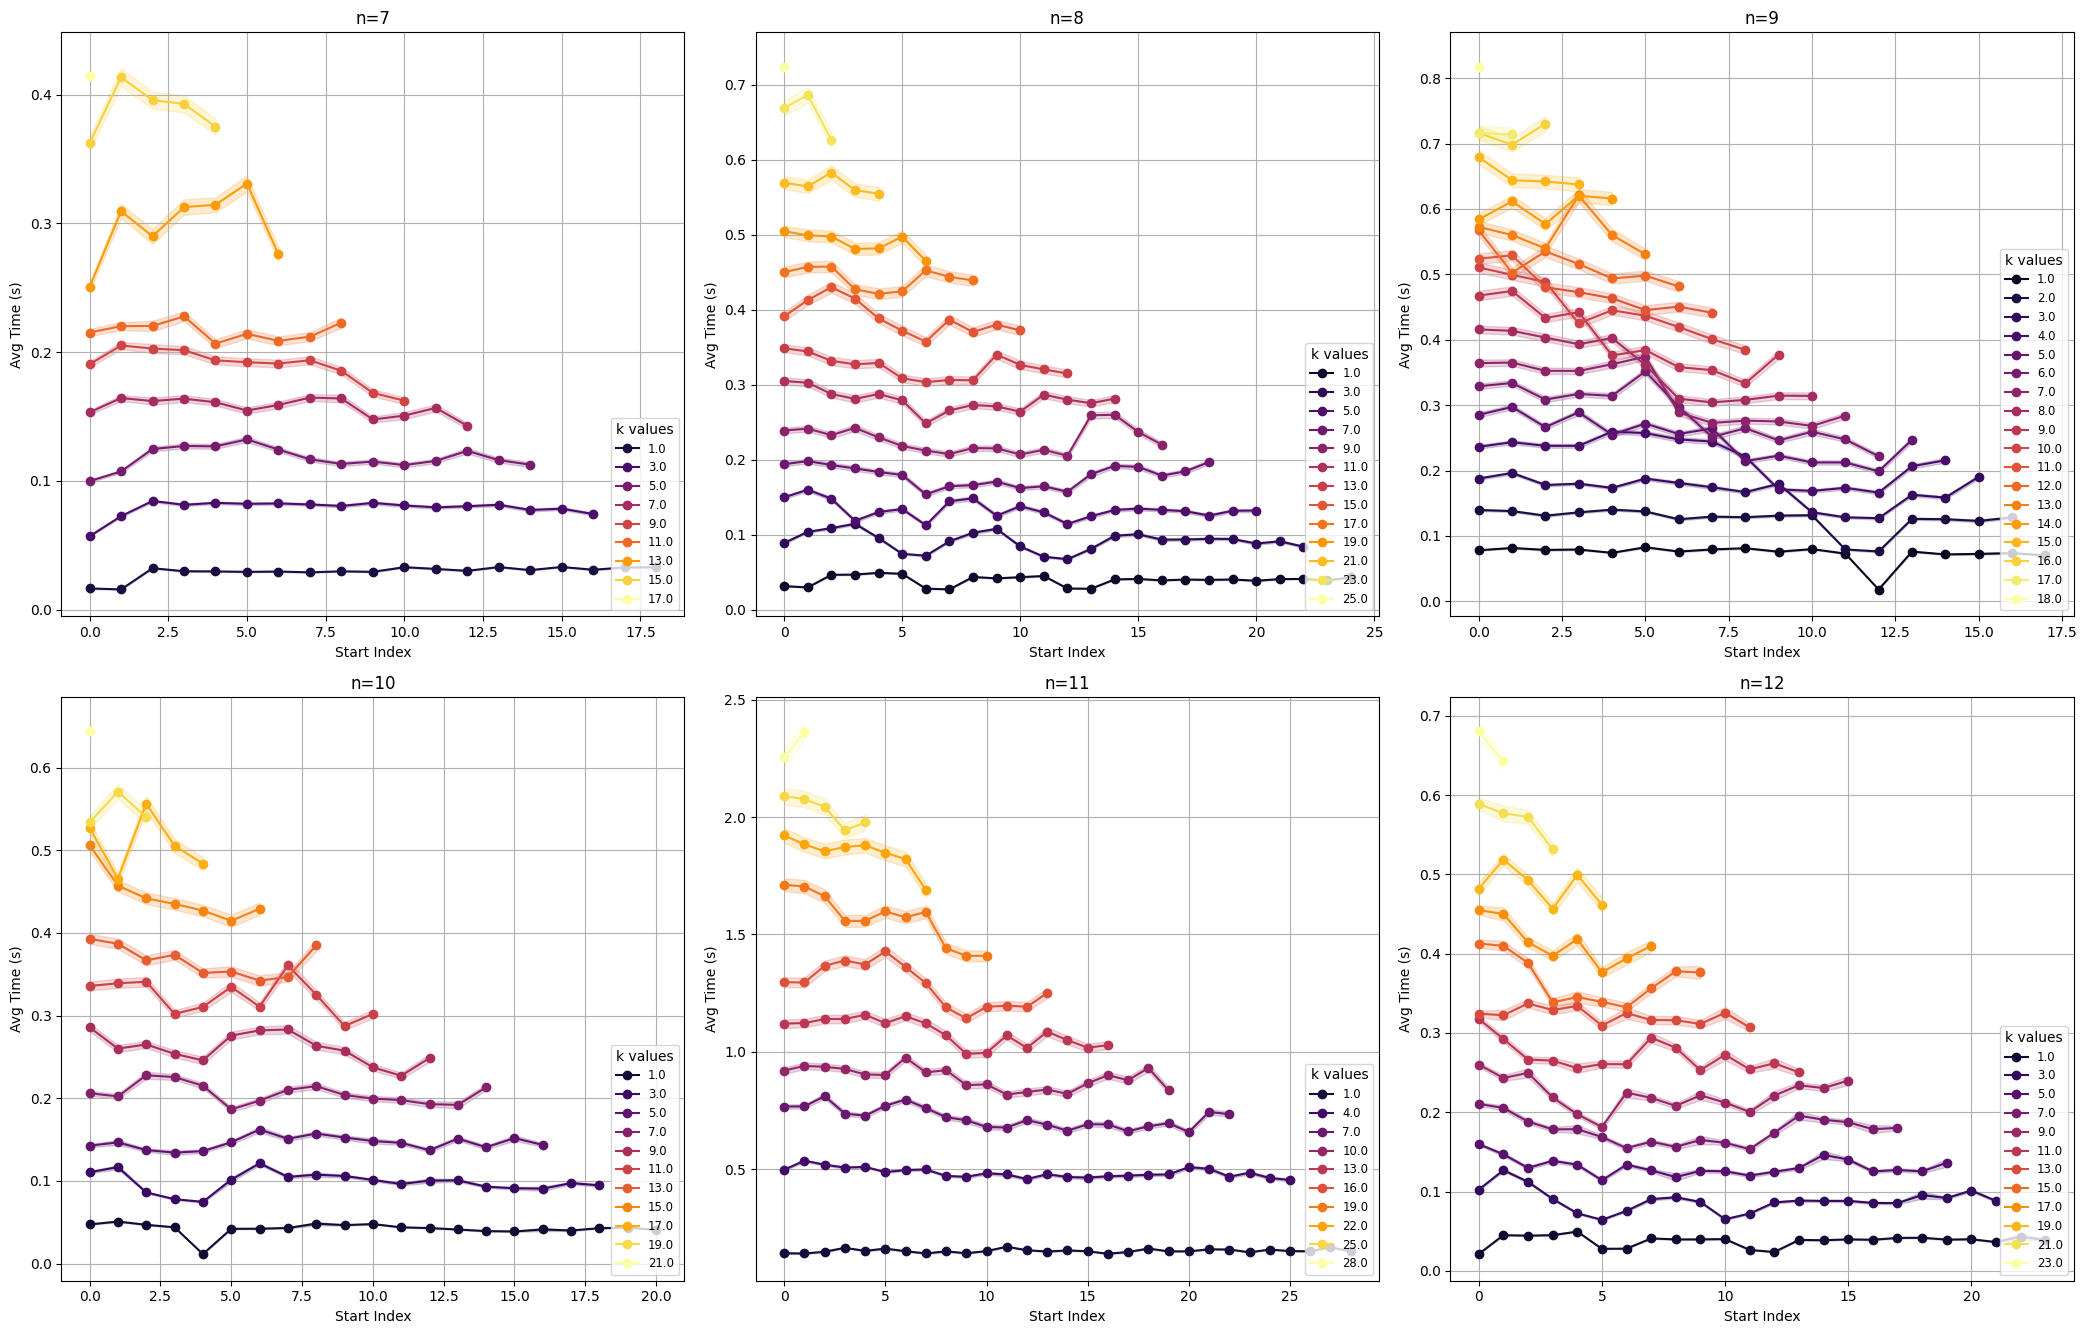

In [7]:
plot("time", "Time (s)")

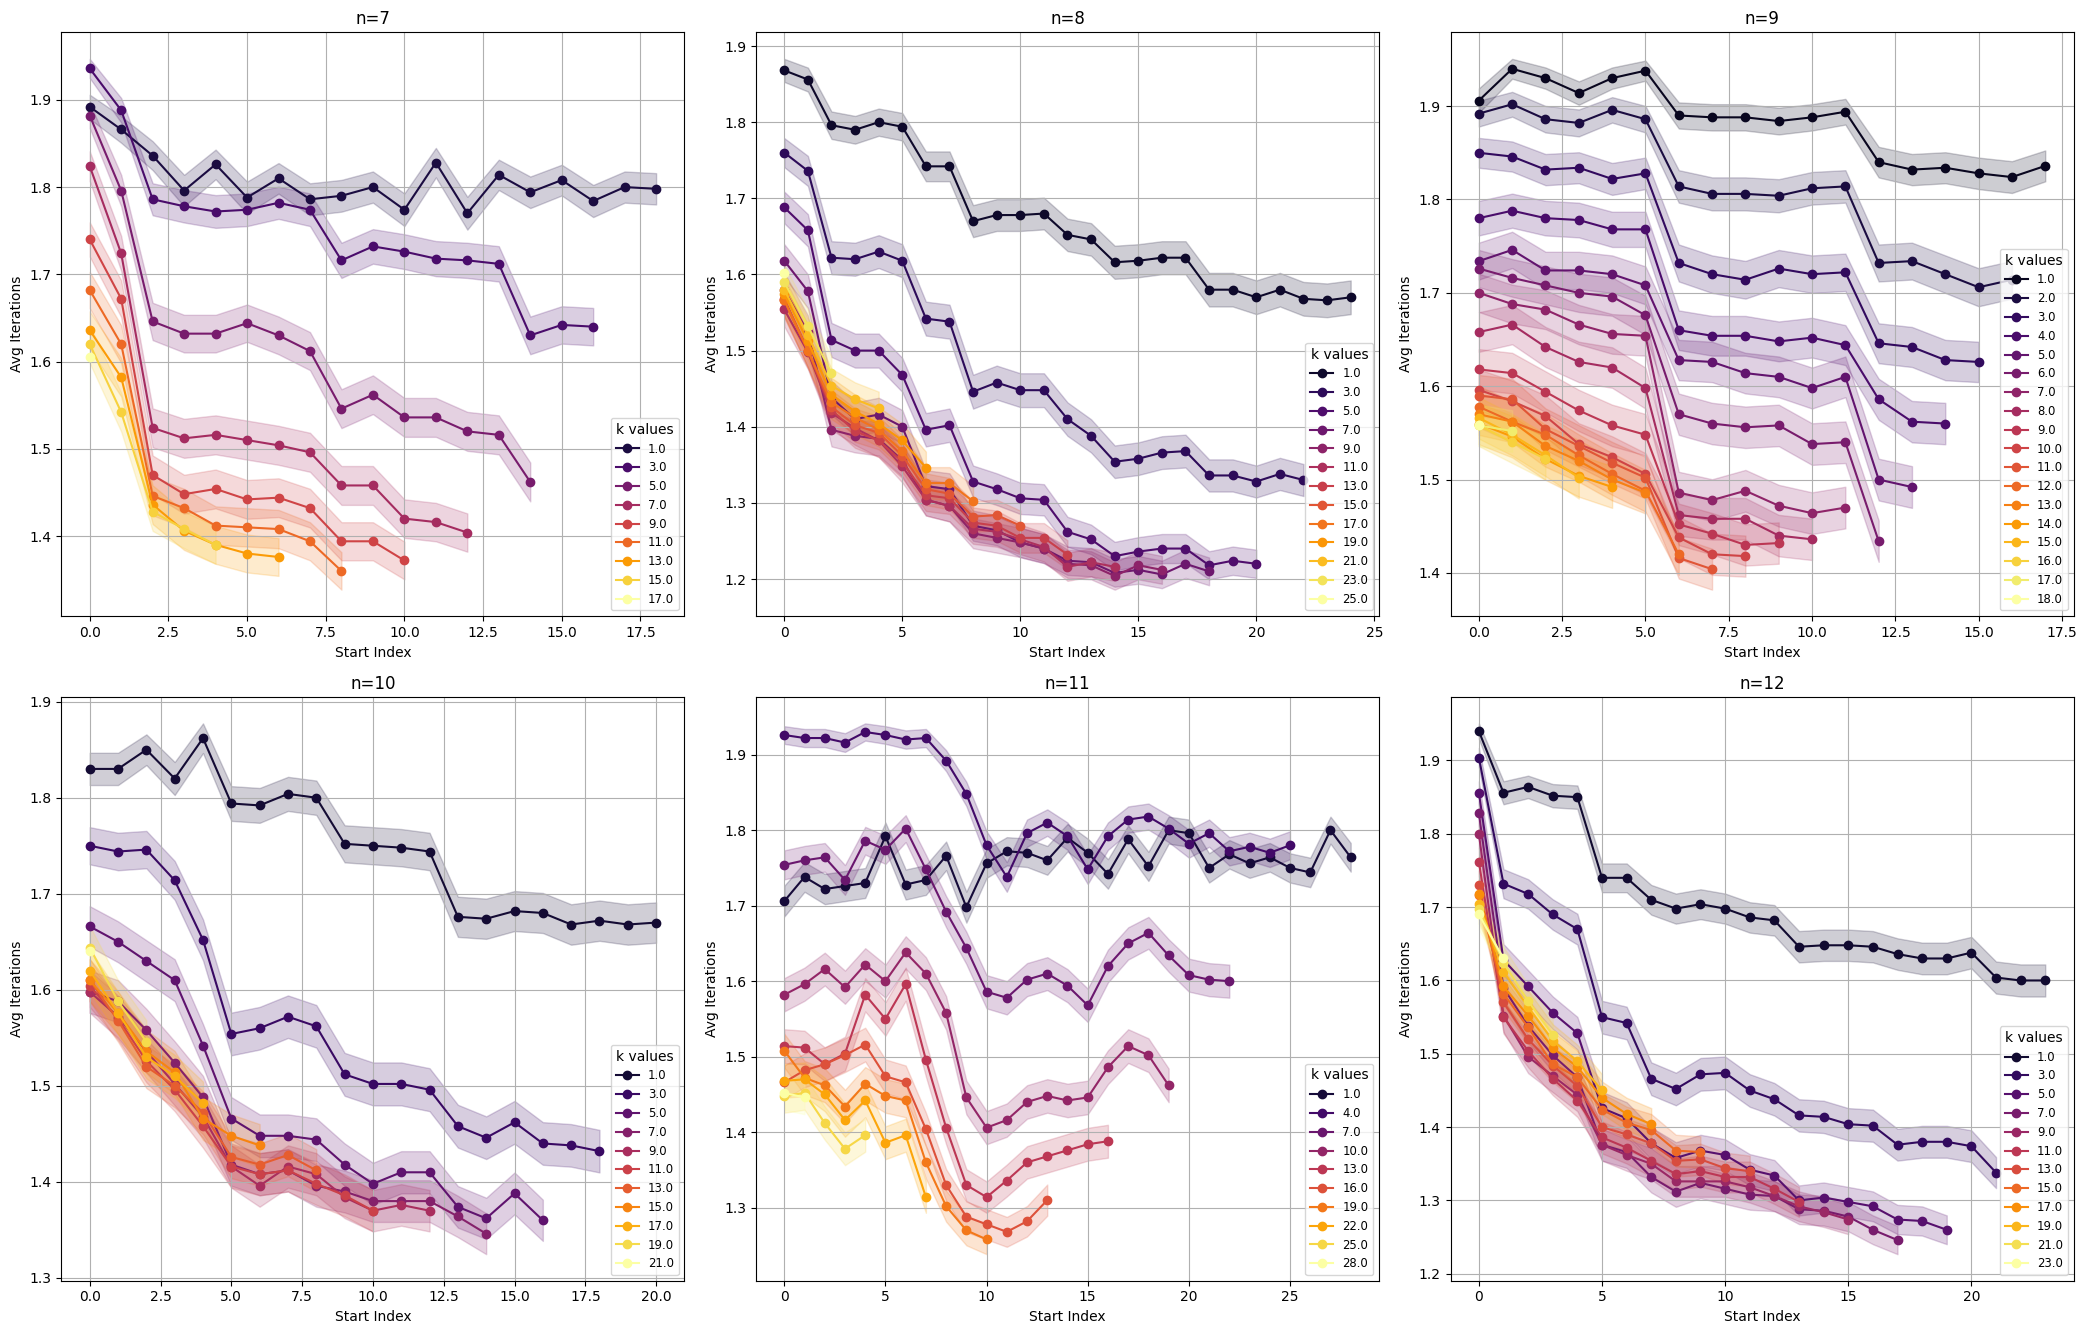

In [8]:
plot("iterations", "Iterations")

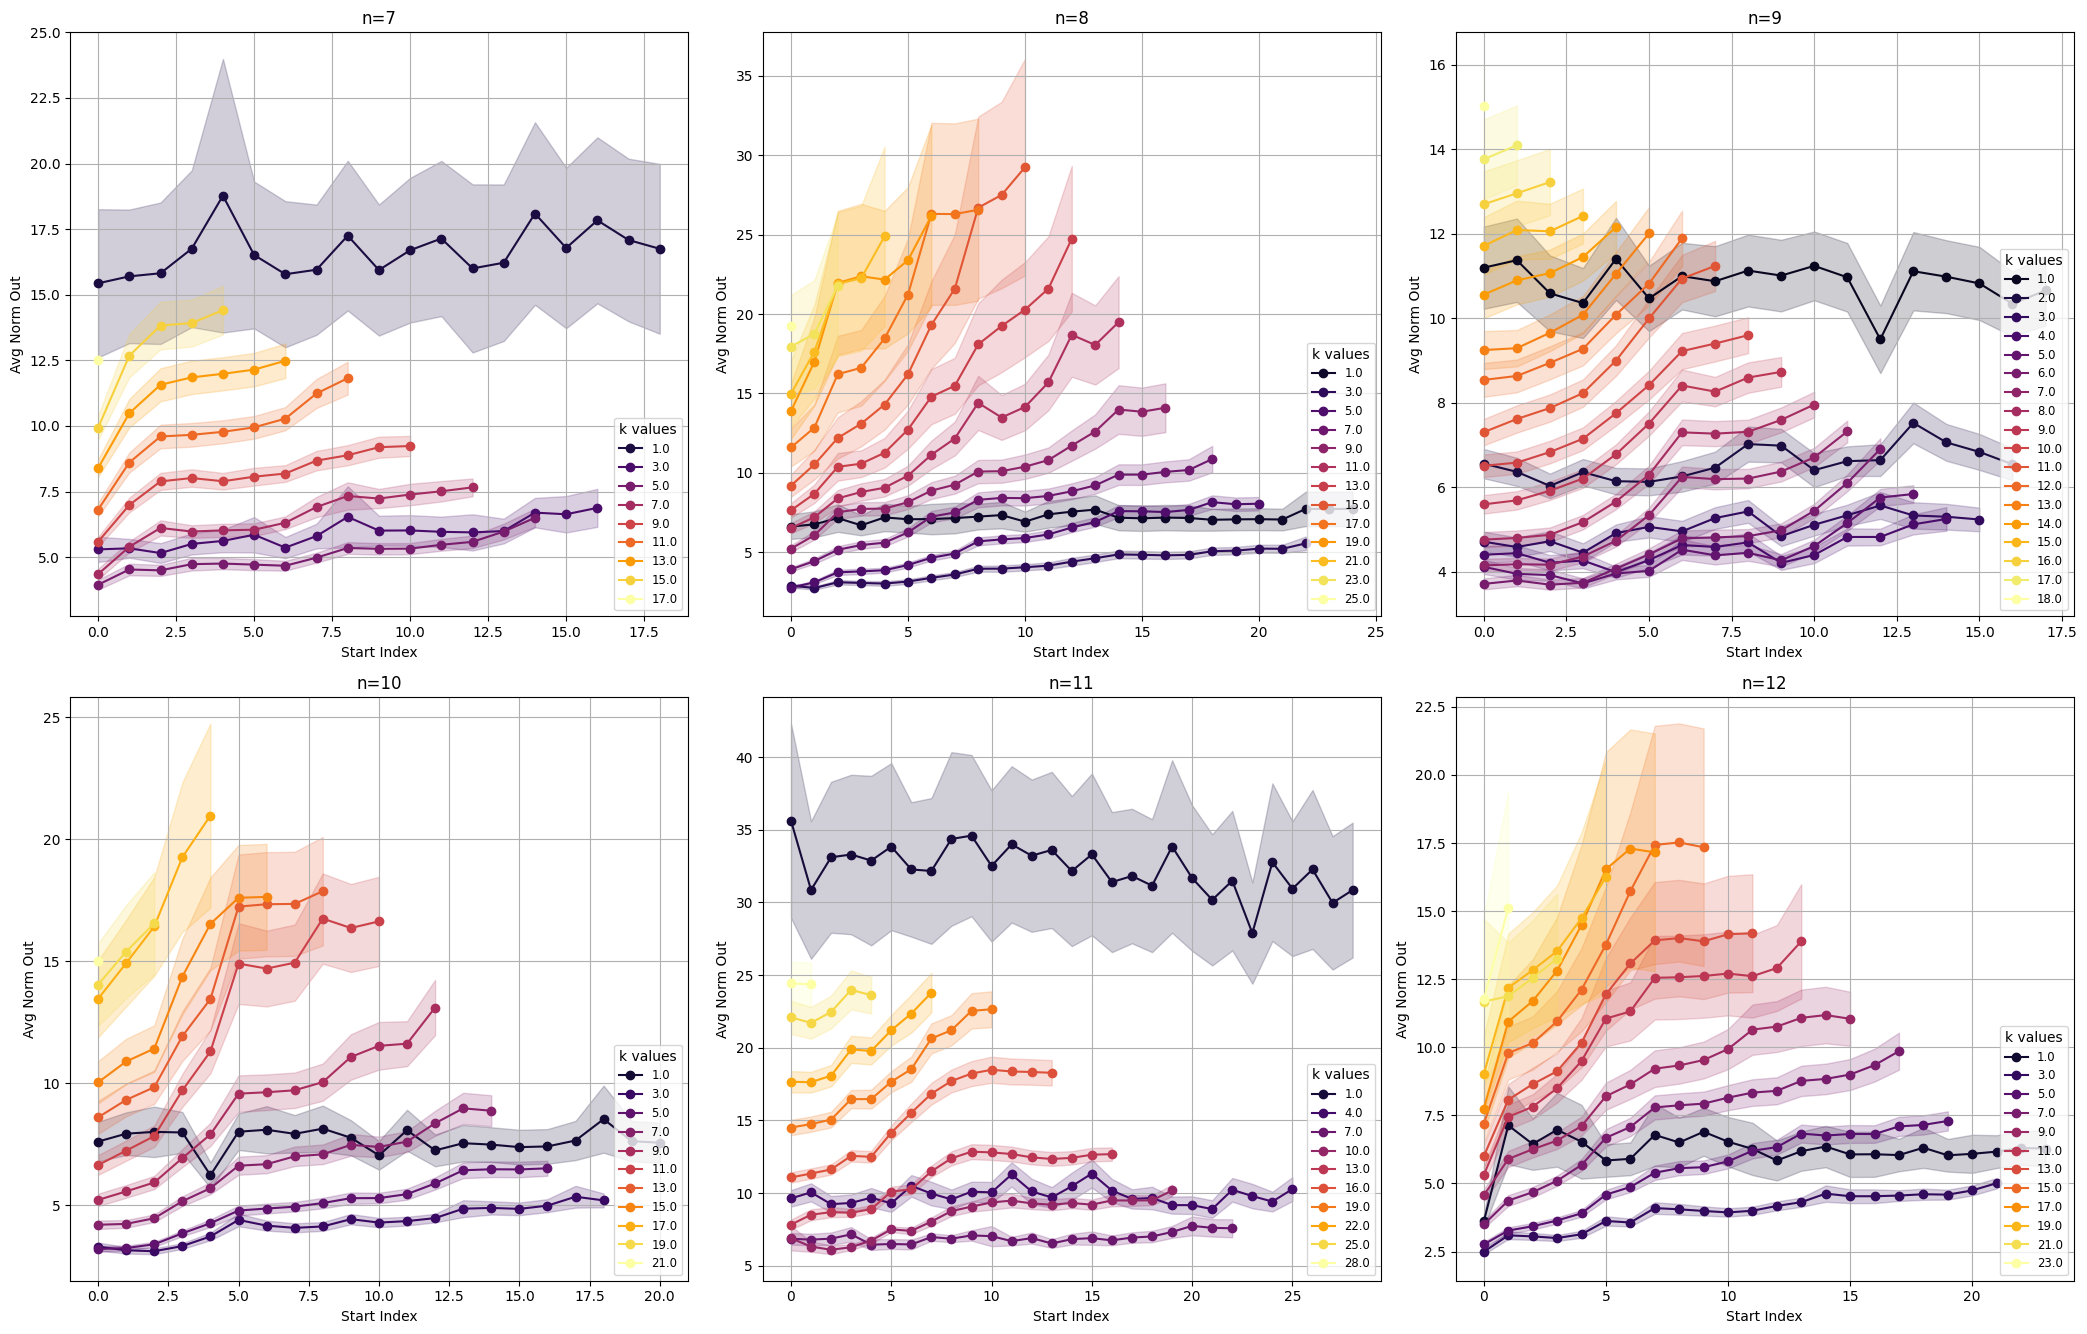

In [9]:
plot("alpha_out_norm", "Norm Out")